## 43 - Find Circles and Ellipses

To identify circles, ellipses, or in general, any shape in which the pixels are connected we use the SimpleBlobDetector() function of OpenCV. 

In non-technical terms, a blob is understood as a thick liquid drop. Here, we are going to call all shapes a blob. Our task is to detect and recognize whether the blob is a circle or not.

OpenCV provides a convenient way to detect blobs and filter them based on different characteristics. There are various different parameters that control the identification process and the results. The important parameters used for this project are: 

Filter by Area - This is to avoid any identification of any small dots present in the image that can be wrongly detected as a circle. 

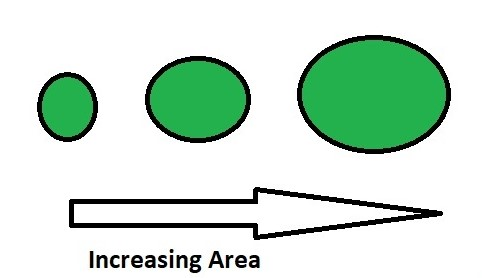

Filter by Circularity - This helps us to identify, shapes that are more similar to a circle. 

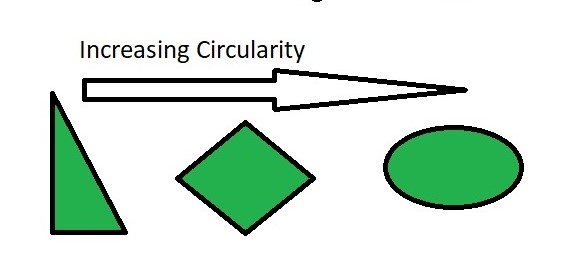

Filter by Convexity - Concavity in general, destroys the circularity. More is the convexity, the closer it is to a close circle.

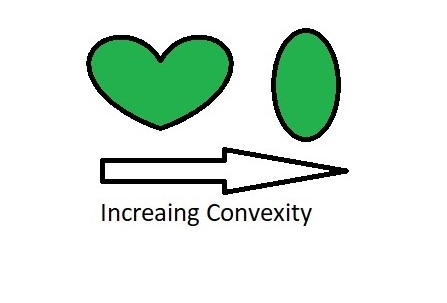

Filter by Inertia - Objects similar to a circle has larger inertial.E.g. for a circle, this value is 1, for an ellipse it is between 0 and 1, and for a line it is 0. To filter by inertia ratio, set filterByInertia = 1, and set, 0 <= minInertiaRatio <= 1 and maxInertiaRatio (<=1 ) appropriately. 

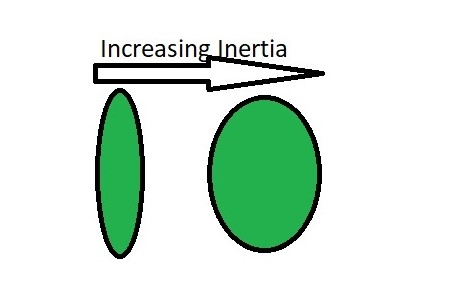

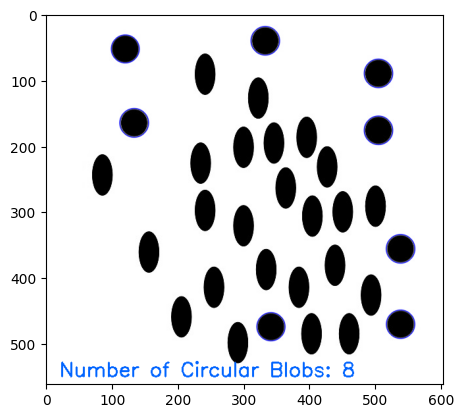

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image
image = cv2.imread('/Users/alireza/Coding/OpenCV_Learning/OpenCV_Learnings/Images/blobs.jpg', 0)

# Set our filtering parameters
# Initialize parameter setting using cv2.SimpleBlobDetector
params = cv2.SimpleBlobDetector_Params()

# Set Area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set Circularity filtering parameters
params.filterByCircularity = True 
params.minCircularity = 0.9

# Set Convexity filtering parameters
params.filterByConvexity = True
params.minConvexity = 0.2
    
# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)
    
# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1, 1)) 
blobs = cv2.drawKeypoints(image, keypoints, blank, (0, 0, 255),
                          cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

number_of_blobs = len(keypoints)
text = "Number of Circular Blobs: " + str(len(keypoints))
cv2.putText(blobs, text, (20, 550),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 100, 255), 2)

# Show blobs
plt.imshow( blobs)
